In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Atur agar semua kolom dan baris ditampilkan
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Contoh membaca file
file_path = "F:/Kampus/Tugas/Semester 2/Konservasi/Data_KPK_2025.xlsx"
xls = pd.ExcelFile(file_path)

# Baca salah satu sheet (misalnya 'Per Proses')
df_proses = pd.read_excel(xls, sheet_name="Rekap KPK")
df_instansi = pd.read_excel(xls, sheet_name="KPK per Instansi")

# Tampilkan semua baris dan kolom
print("=== Per Proses ===")
print(df_proses)
print("\n=== Per Instansi ===")
print(df_instansi)

=== Per Proses ===
     Unnamed: 0  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
0  Penyelidikan  23.0    29    36    70    70    67    54    78    77    81   
1    Penyidikan   2.0    19    27    24    47    37    40    39    48    70   
2    Penuntutan   2.0    17    23    19    35    32    32    40    36    41   
3      Inkracht   NaN     5    14    19    23    37    34    34    28    40   
4      Eksekusi   NaN     4    13    23    24    37    36    34    32    44   

   2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  2024  2025  \
0    80    87    96   123   164   142   111   119   113   127    73    12   
1    58    57    99   121   199   145    91   108   120   161   154    28   
2    50    62    76   103   151   153    75    88   133   129    90    33   
3    45    38    71    84   109   142    92    87   141   113    91    14   
4    48    38    81    83   113   136   108    89   101   124   108    16   

   Total  
0   1832  
1   1694  
2   1420  

In [3]:
# Proses pembersihan
df_proses.columns = df_proses.columns.str.strip().str.lower().str.replace(' ', '_')  # Normalisasi nama kolom
df_proses.dropna(how='all', inplace=True)  # Hapus baris kosong semua
df_proses.dropna(axis=1, how='all', inplace=True)  # Hapus kolom kosong semua

df_instansi.columns = df_instansi.columns.str.strip().str.lower().str.replace(' ', '_')  # Normalisasi nama kolom
df_instansi.dropna(how='all', inplace=True)  # Hapus baris kosong semua
df_instansi.dropna(axis=1, how='all', inplace=True)  # Hapus kolom kosong semua
# Untuk df_proses
for col in df_proses.columns[1:]:  # Lewati kolom pertama (biasanya label kategori)
    df_proses[col] = pd.to_numeric(df_proses[col], errors='coerce').fillna(0).astype(int)

# Untuk df_instansi
for col in df_instansi.columns[1:]:  # Lewati kolom pertama
    df_instansi[col] = pd.to_numeric(df_instansi[col], errors='coerce').fillna(0).astype(int)


In [4]:
df_instansi.fillna(0, inplace=True)

In [5]:
print("\nSetelah dibersihkan:")
print("=== Per Proses ===")
print(df_proses.info())
print(df_proses.head())
print("\n=== Per Instansi ===")
print(df_instansi.info())
print(df_instansi.head())


Setelah dibersihkan:
=== Per Proses ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unnamed:_0  5 non-null      object
 1   2004        5 non-null      int64 
 2   2005        5 non-null      int64 
 3   2006        5 non-null      int64 
 4   2007        5 non-null      int64 
 5   2008        5 non-null      int64 
 6   2009        5 non-null      int64 
 7   2010        5 non-null      int64 
 8   2011        5 non-null      int64 
 9   2012        5 non-null      int64 
 10  2013        5 non-null      int64 
 11  2014        5 non-null      int64 
 12  2015        5 non-null      int64 
 13  2016        5 non-null      int64 
 14  2017        5 non-null      int64 
 15  2018        5 non-null      int64 
 16  2019        5 non-null      int64 
 17  2020        5 non-null      int64 
 18  2021        5 non-null      int64 
 19  2022        5

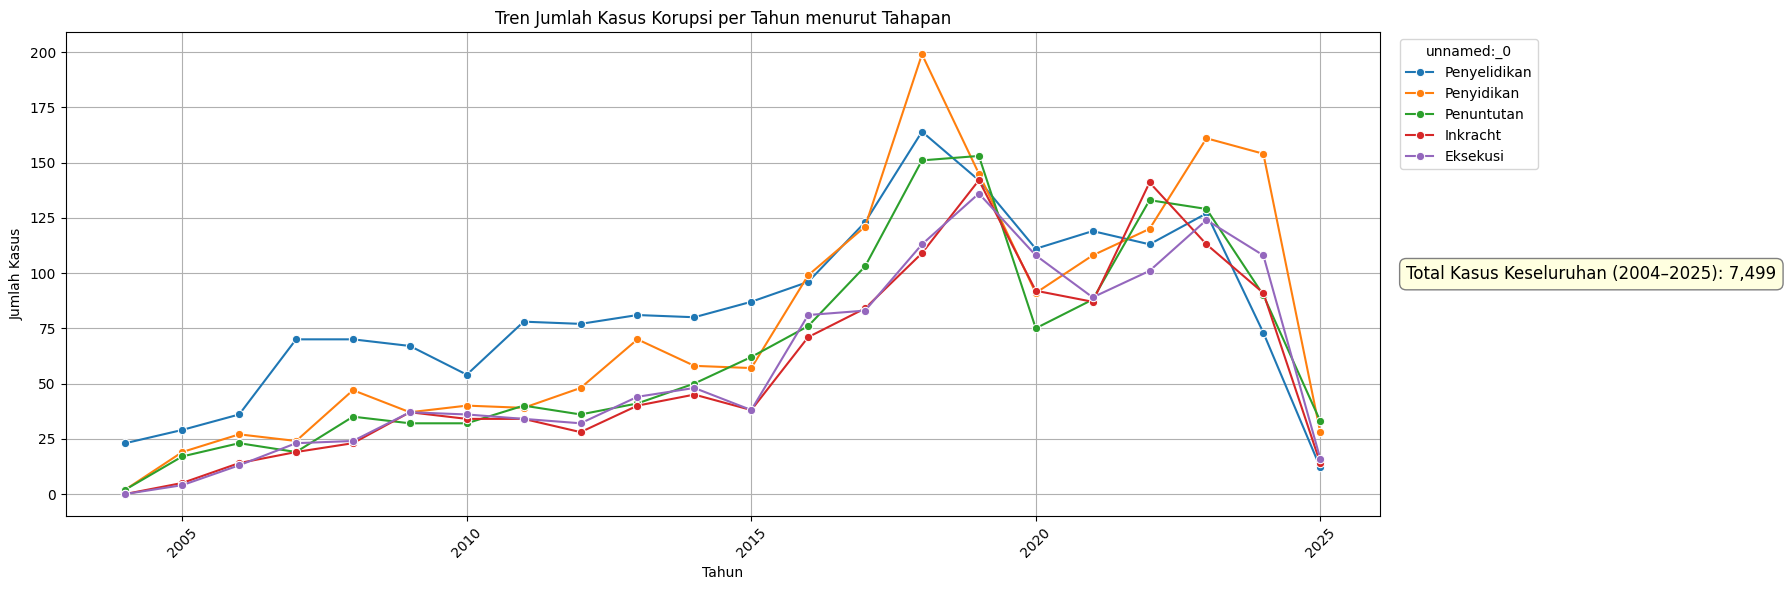

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan df_proses sudah didefinisikan sebelumnya
# Ambil nama kolom pertama yang berisi kategori tahapan
nama_kolom_proses = df_proses.columns[0]  # Misalnya: 'Proses'

# Simpan nilai total untuk ditampilkan nanti
total_kasus_semua = df_proses['total'].sum()

# Buang kolom "Total" agar tidak digambarkan
df_proses_no_total = df_proses.drop(columns=["total"])

# Ubah data menjadi format long
df_melted = df_proses_no_total.melt(
    id_vars=nama_kolom_proses, 
    var_name="Tahun", 
    value_name="Jumlah_Kasus"
)

# Konversi ke tipe data yang sesuai
df_melted["Tahun"] = df_melted["Tahun"].astype(int)
df_melted["Jumlah_Kasus"] = pd.to_numeric(df_melted["Jumlah_Kasus"], errors="coerce").fillna(0).astype(int)

# Filter tahun 2004–2025
df_filtered = df_melted[df_melted["Tahun"].between(2004, 2025)]

# Plot dengan seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df_filtered, 
    x="Tahun", 
    y="Jumlah_Kasus", 
    hue=nama_kolom_proses, 
    marker="o", 
    palette="tab10"
)

# Judul dan label
plt.title("Tren Jumlah Kasus Korupsi per Tahun menurut Tahapan")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kasus")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Anotasi total kasus keseluruhan
plt.text(
    1.02, 0.5, 
    f"Total Kasus Keseluruhan (2004–2025): {total_kasus_semua:,}",
    transform=plt.gca().transAxes, 
    fontsize=12, 
    verticalalignment='center',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="lightyellow", edgecolor="gray")
)

# Legenda
plt.legend(title=nama_kolom_proses, bbox_to_anchor=(1.01, 1), loc="upper left")
plt.show()


C:\Users\Inzaghi\AppData\Local\Temp\ipykernel_7672\1351981260.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="jumlah", y=df_sorted.columns[0], palette="viridis")


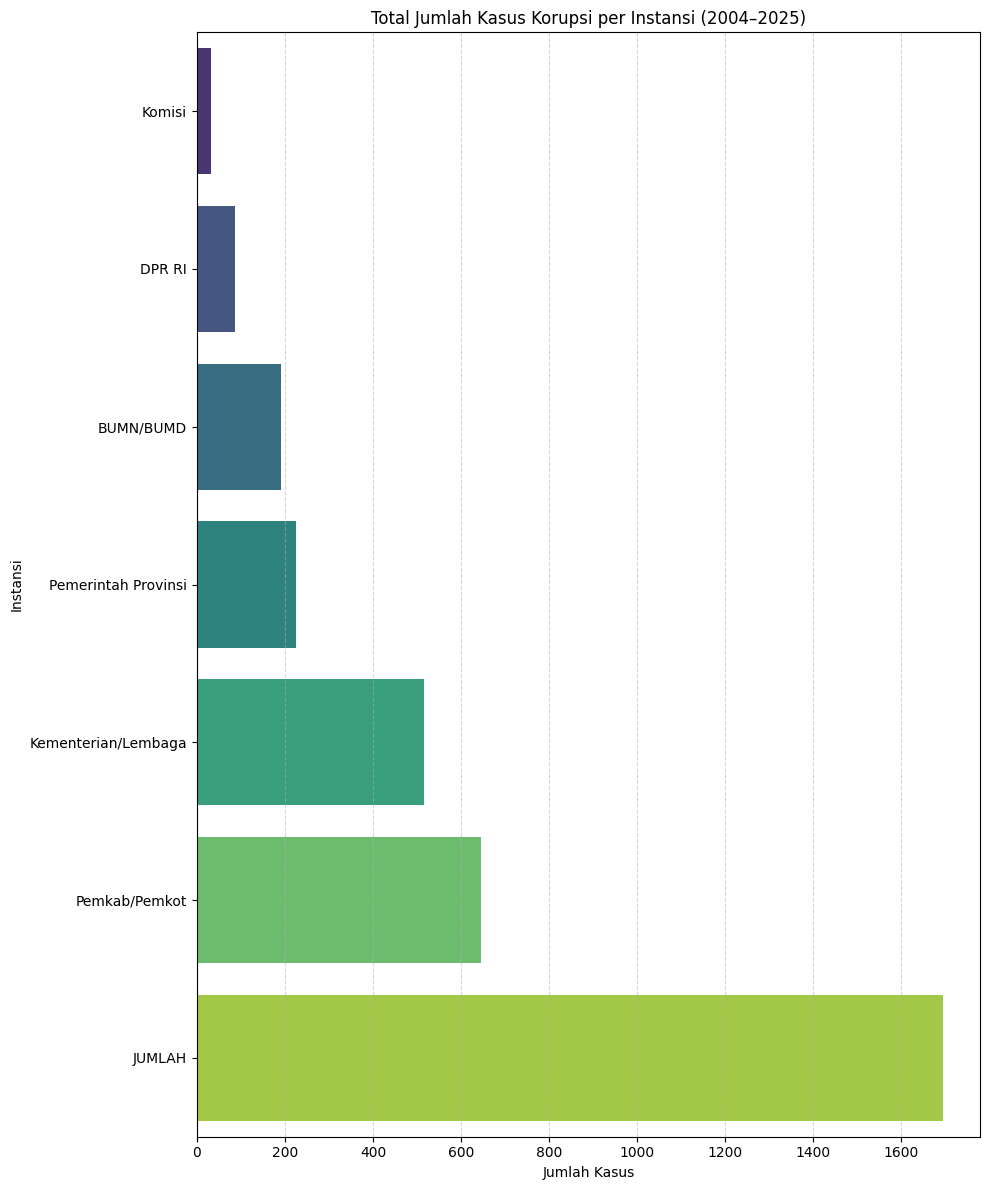

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan df_instansi sudah dibaca dari Excel dan bernama df_instansi

# Pastikan nama kolom konsisten (hapus spasi jika ada)
df_instansi.columns = df_instansi.columns.str.strip()

# Sort berdasarkan jumlah kasus
df_sorted = df_instansi.sort_values("jumlah", ascending=True)

# Plot
plt.figure(figsize=(10, 12))
sns.barplot(data=df_sorted, x="jumlah", y=df_sorted.columns[0], palette="viridis")

# Judul dan label
plt.title("Total Jumlah Kasus Korupsi per Instansi (2004–2025)")
plt.xlabel("Jumlah Kasus")
plt.ylabel("Instansi")
plt.tight_layout()
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


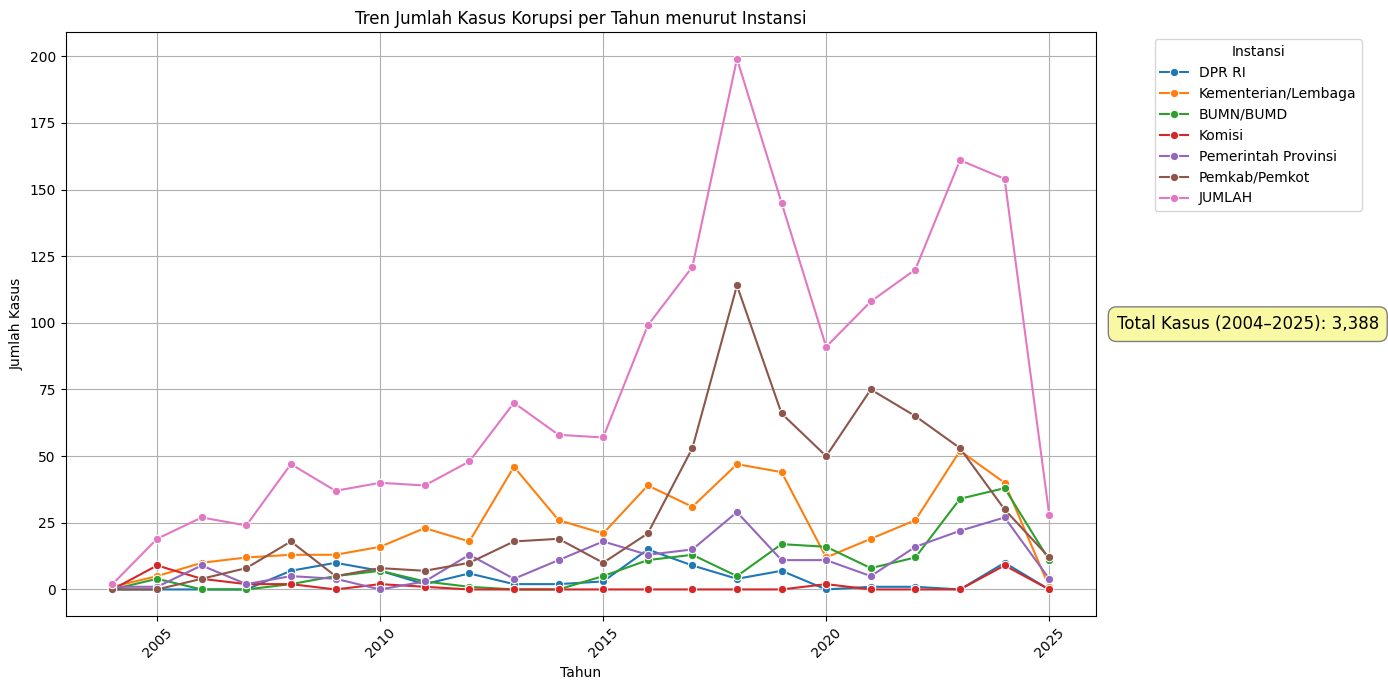

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_long = df_instansi.melt(
id_vars=["instansi"],
value_vars=[str(year) for year in range(2004, 2026)],
var_name="Tahun",
value_name="Jumlah_Kasus"
)

df_long["Tahun"] = df_long["Tahun"].astype(int)
df_long["Jumlah_Kasus"] = pd.to_numeric(df_long["Jumlah_Kasus"], errors="coerce").fillna(0)

total_kasus = int(df_long["Jumlah_Kasus"].sum())

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_long, x="Tahun", y="Jumlah_Kasus", hue="instansi", marker="o")

plt.text(
x=1.02, y=0.5, s=f"Total Kasus (2004–2025): {total_kasus:,}",
transform=plt.gca().transAxes,
fontsize=12, verticalalignment='center',
bbox=dict(boxstyle="round,pad=0.5", facecolor="#f9f9a3", edgecolor="gray")
)

plt.title("Tren Jumlah Kasus Korupsi per Tahun menurut Instansi")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kasus")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Instansi", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

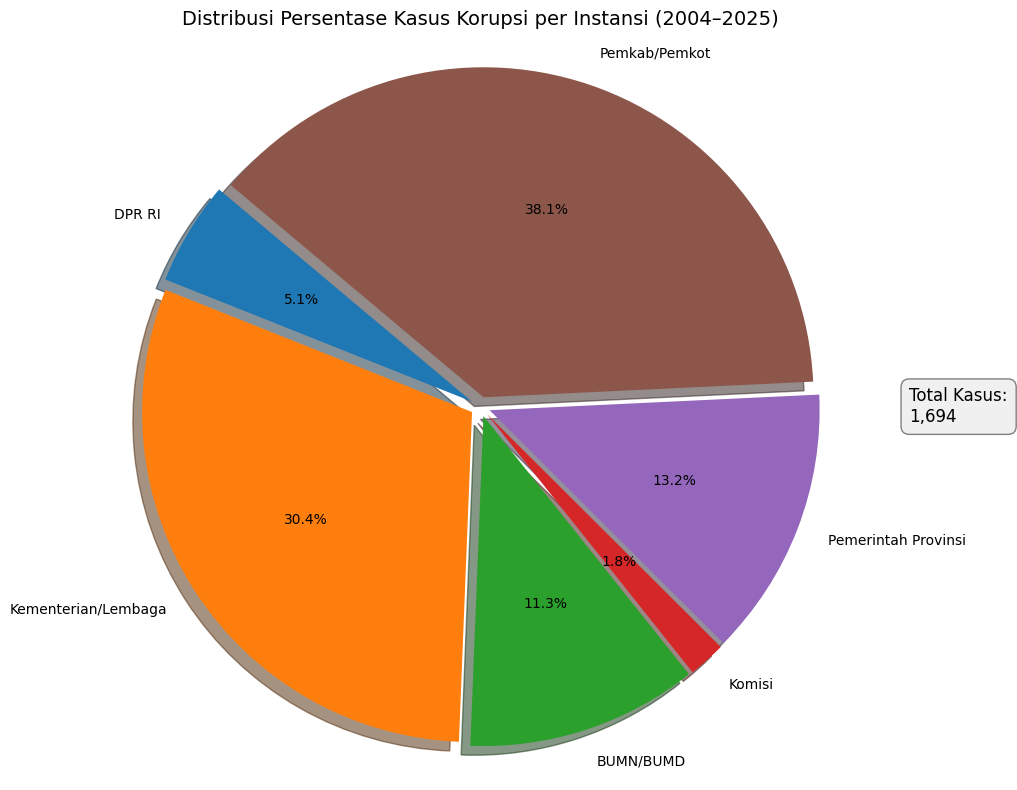

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan hanya kolom tahun 2004–2025 yang diambil
tahun_cols = [str(year) for year in range(2004, 2026)]
df_pie = df_instansi[["instansi"] + tahun_cols].copy()

# Hapus baris yang mengandung 'JUMLAH' atau 'Total' di kolom instansi
df_pie = df_pie[~df_pie["instansi"].str.upper().str.contains("JUMLAH|TOTAL")]

# Hitung total kasus per instansi
df_pie["Total_Kasus"] = df_pie[tahun_cols].sum(axis=1)

# Hitung total keseluruhan
total_kasus_semua = int(df_pie["Total_Kasus"].sum())

# Buat pie chart berdasarkan persentase
labels = df_pie["instansi"]
sizes = df_pie["Total_Kasus"]
explode = [0.03] * len(labels)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: f'{pct:.1f}%' if pct > 0 else '',
    startangle=140,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 10}
)

# Center pie chart
ax.axis('equal')

# Tambahkan total kasus keseluruhan di samping pie chart
plt.text(
    1.3, 0, f"Total Kasus:\n{total_kasus_semua:,}",
    fontsize=12,
    verticalalignment='center',
    bbox=dict(boxstyle="round,pad=0.5", facecolor="#f0f0f0", edgecolor="gray")
)

plt.title("Distribusi Persentase Kasus Korupsi per Instansi (2004–2025)", fontsize=14)
plt.tight_layout()
plt.show()


In [3]:
file_path = "F:/Kampus/Tugas/Semester 2/Konservasi/10 Kasus Besar Korupsi di Indonesia.xlsx"
df_kasus = pd.read_excel(file_path)
print(df_kasus)

   No.                               Kasus Korupsi Perkiraan Kerugian Negara  \
0    1                        Korupsi PT Timah Tbk            Rp 300 Triliun   
1    2        Korupsi Tata Kelola Minyak Pertamina          Rp 193,7 Triliun   
2    3    BLBI (Bantuan Likuiditas Bank Indonesia)            Rp 138 Triliun   
3    4         Penyerobotan Lahan Duta Palma Group             Rp 78 Triliun   
4    5                             Korupsi PT TPPI           Rp 37,8 Triliun   
5    6                           Korupsi PT Asabri           Rp 22,7 Triliun   
6    7                        Korupsi PT Jiwasraya           Rp 16,8 Triliun   
7    8                     Korupsi Izin Ekspor CPO             Rp 12 Triliun   
8    9               Korupsi Proyek BTS 4G Kominfo              Rp 8 Triliun   
9   10  Korupsi Pengadaan Pesawat Garuda Indonesia           Rp 9,37 Triliun   

   Tahun Terungkap  Rentang Waktu di Media Massa  \
0             2024                          2025   
1             2

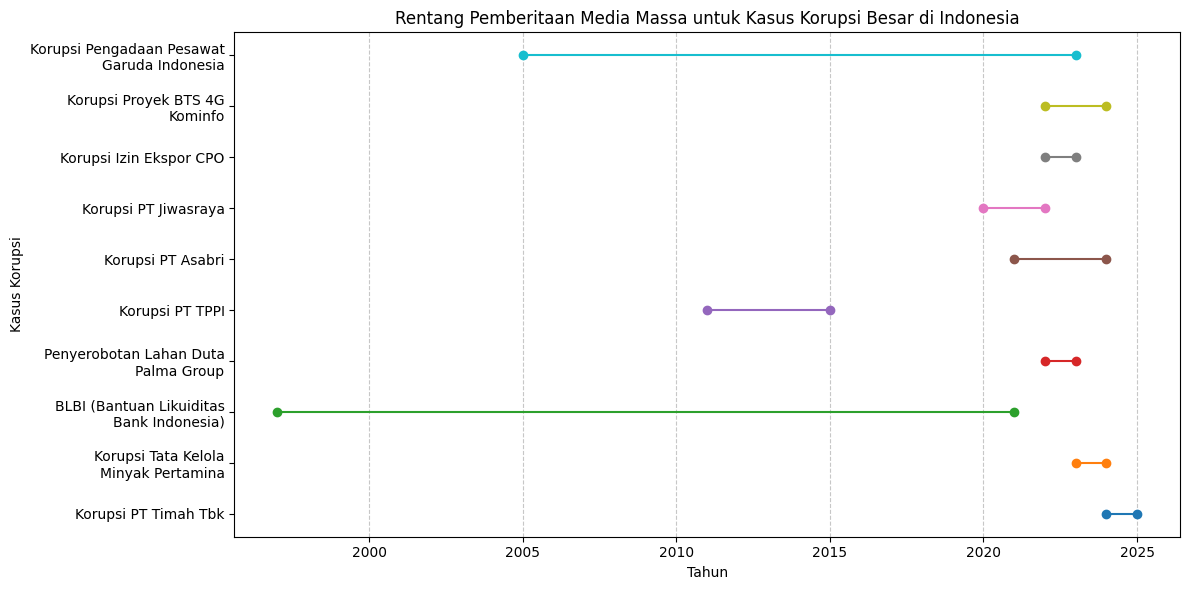

In [13]:
import matplotlib.pyplot as plt

# Buat kolom baru: nama singkat kasus untuk ditampilkan
df_kasus['Kasus_Singkat'] = df_kasus['Kasus Korupsi'].str.wrap(25)

# Buat plot
plt.figure(figsize=(12, 6))

for i, row in df_kasus.iterrows():
    plt.plot([row['Tahun Terungkap'], row['Rentang Waktu di Media Massa']], [i, i], marker='o')

# Format y-axis: nama kasus
plt.yticks(range(len(df_kasus)), df_kasus['Kasus_Singkat'])

plt.title('Rentang Pemberitaan Media Massa untuk Kasus Korupsi Besar di Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Kasus Korupsi')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
